In [3]:
from Bio import SeqIO

In [4]:
import pandas as pd
from itertools import combinations
import numpy as np
from colour import Color
count = 0

annotationfile = './coronaGenoWuhan.gb'
parser = SeqIO.parse( annotationfile , 'gb')
### stack graph
for entry in parser:
    for feature in entry.features:
        if 'product' in feature.qualifiers:
            count +=1

In [5]:
models = ' 6zxn,5x58,6cs0,6sc1,6nb6, 2jw8, 2xab, 4aud1, 1yo4, 2acf, 2wct, 3vc8, 2gt7, 3ee7, 2g9t, 3ee7, 2g9t, 6jyt, 1ysy, 6nur, 2g9t, 5c8u, 2g9t, 2xyq, 4mm3, 6cs2, 6acg, 6acj, 6ack, 2dd8, 2ghw, 6nb6, 6nb7'
models = models.split(',')
templatedir = './templates/'

In [6]:
import os
import wget
import requests
import glob
import time
clear = False

In [7]:
if not os.path.isdir(templatedir):
    os.mkdir(templatedir)
if clear == True:
    files = glob.glob(templatedir+'*.pdb')
    for f in files:
        os.remove(f)

In [8]:
from Bio.PDB import *
dl_url = 'http://files.rcsb.org/download/'
dl_url_err = 'http://files.rcsb.org/download/'

structs = {}
already = glob.glob( './templates/*.pdb' )
print(already)
#pull complexes
for m in models:
    structfile = './templates/'+m.upper().strip()+'.pdb'
    if structfile not in already:
        print(m)
        time.sleep(1)
        try:
            wget.download(url = dl_url + m.strip() +'.pdb' , out =structfile)
            structs[m] = structfile
        except:
            try:
                wget.download(url = dl_url + m.strip() +'.pdb' , out =structfile)
                structs[m] = structfile
            except:
                print('err', m )
    else:
        structs[m.strip()] = structfile


['./templates/6ACG.pdb', './templates/6NUR.pdb', './templates/5C8U.pdb', './templates/PL-PRO_C_terminal.pdb', './templates/nsp2.pdb', './templates/2DD8.pdb', './templates/2WCT.pdb', './templates/6ACJ.pdb', './templates/2G9T (1).pdb', './templates/6NB6.pdb', './templates/5X58.pdb', './templates/nsp4.pdb', './templates/6NB7.pdb', './templates/6JYT.pdb', './templates/2GT7.pdb', './templates/3VC8.pdb', './templates/3EE7.pdb', './templates/nsp6.pdb', './templates/6ZXN.pdb', './templates/4MM3.pdb', './templates/6SC1.pdb', './templates/2ACF.pdb', './templates/2G9T.pdb', './templates/M_protein.pdb', './templates/2XYQ.pdb', './templates/6NB6 (1).pdb', './templates/6CS2.pdb', './templates/6CS0.pdb', './templates/1YSY.pdb', './templates/1YO4.pdb', './templates/2XAB.pdb', './templates/6ACK.pdb', './templates/2GHW.pdb', './templates/2JW8.pdb', './templates/3EE7 (1).pdb']
 4aud1
err  4aud1


In [9]:
print(structs)

{'6zxn': './templates/6ZXN.pdb', '5x58': './templates/5X58.pdb', '6cs0': './templates/6CS0.pdb', '6sc1': './templates/6SC1.pdb', '6nb6': './templates/6NB6.pdb', '2jw8': './templates/2JW8.pdb', '2xab': './templates/2XAB.pdb', '1yo4': './templates/1YO4.pdb', '2acf': './templates/2ACF.pdb', '2wct': './templates/2WCT.pdb', '3vc8': './templates/3VC8.pdb', '2gt7': './templates/2GT7.pdb', '3ee7': './templates/3EE7.pdb', '2g9t': './templates/2G9T.pdb', '6jyt': './templates/6JYT.pdb', '1ysy': './templates/1YSY.pdb', '6nur': './templates/6NUR.pdb', '5c8u': './templates/5C8U.pdb', '2xyq': './templates/2XYQ.pdb', '4mm3': './templates/4MM3.pdb', '6cs2': './templates/6CS2.pdb', '6acg': './templates/6ACG.pdb', '6acj': './templates/6ACJ.pdb', '6ack': './templates/6ACK.pdb', '2dd8': './templates/2DD8.pdb', '2ghw': './templates/2GHW.pdb', '6nb7': './templates/6NB7.pdb'}


In [10]:
#open all the complexes and pull sequences
#convert to json
from Bio import Alphabet
parser = PDBParser()
from Bio.SeqUtils import seq1
letter3 = Alphabet.ThreeLetterProtein.letters
converter = { l.upper(): seq1(l) for l in letter3 }
print(converter)

{'ALA': 'A', 'ASX': 'B', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L', 'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R', 'SER': 'S', 'THR': 'T', 'SEC': 'U', 'VAL': 'V', 'TRP': 'W', 'XAA': 'X', 'TYR': 'Y', 'GLX': 'Z'}


In [14]:
alnfile = '../lucy_mk3/gisaid_hcov-2020_08_25.QC.NSoutlier.filter.deMaiomask.EPIID.aln'
#clusterfile = alnfile + 'jackknife_clusterpositions_columns.csv'
clusterfile = alnfile + 'RBMising_clusterpositions_columns.csv'
clusterdf = pd.read_csv( clusterfile)

In [15]:
import subprocess
import shlex
import pandas as pd 
import warnings


#collapse codons
#use tblastn to map to prot

from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
ppb=PPBuilder()

structseqs={}


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    with open( 'structs.fast' , 'w')as fastout:
        for s in structs:
            Structure = PDBParser().get_structure(s, structs[s])
            for model in Structure:
                for chain in model:
                    res = chain.get_residues()
                    seq =  ''.join([ converter[r.get_resname()] for r in res if r.get_resname() in converter ] )
                    fastout.write('>' + s + '|'+ chain.id +'\n')
                    fastout.write(str( seq ) +'\n'  )
                    structseqs[ s + '|'+ chain.id ] = seq
                    #for i, pp in enumerate(ppb.build_peptides(chain)):

                        #seq = str(pp.get_sequence()).lower()

                        #structseqs[ s + '|'+ chain.id ] = seq
                        #fastout.write('>' + s + '|'+ chain.id +'|'+str(i)+'\n')
                        #fastout.write(str( seq ) +'\n'  )


def makeblastDB(fasta , blastdb):
    print(fasta)
    #make a blast database with the structures
    args = 'makeblastdb -in '+ fasta +' -out '+ blastdb + ' -dbtype prot'
    p = subprocess.run( shlex.split(args) )
    return p ,  blastdb


def runblastx( qfile ,db ,  outannot = 'outannot.txt' , outfmt = None ):
    if outfmt is None:
        outfmt = [ 'qseqid' , 'sseqid' , 'qlen' ,  'slen' , 'qstart' , 'qend' ,  'qframe' , 'evalue' ]
        outfmt =  ' "10 ' + ''.join([fmt+ ' ' for fmt in outfmt]) + ' " '
        print(outfmt)
        print(db)
    args = 'blastx -query '+ qfile + ' -db '+ db +' -outfmt' + outfmt + ' -out ' + outannot  
    p = subprocess.run( shlex.split(args) )
    return p , outannot


out = 'outannot.txt'
p,blastdb = makeblastDB( './structs.fast' , 'structDB' )
p,annot = runblastx( 'covid19geno.fasta' , blastdb )

annotation = pd.read_csv( annot , header = None )
annotation.columns = [ 'qseqid' , 'sseqid' , 'qlen' ,  'slen' , 'qstart' , 'qend' ,  'qframe' , 'evalue' ] 
annotation = annotation[ annotation['evalue'] < 10**-3 ]
annotation = annotation[annotation.evalue < 10 ** -20 ]
annotation = annotation.drop_duplicates(['sseqid'])
annotation['struct'] = annotation.sseqid.map(lambda x : x.split('|')[0])
annotation['chain'] = annotation.sseqid.map(lambda x : x.split('|')[1])
print(annotation)

print(len(annotation), ' orfs detected')
#recluster codons
#load blast results into df




./structs.fast
 "10 qseqid sseqid qlen slen qstart qend qframe evalue  " 
structDB
          qseqid  sseqid   qlen  slen  qstart   qend  qframe        evalue  \
0    NC_045512.2  6zxn|A  29903  1060   21602  25000       2  0.000000e+00   
1    NC_045512.2  6zxn|C  29903  1054   21602  25000       2  0.000000e+00   
2    NC_045512.2  6zxn|B  29903  1054   21602  25000       2  0.000000e+00   
3    NC_045512.2  6nb6|A  29903  1052   21662  24997       2  0.000000e+00   
4    NC_045512.2  6nb6|C  29903  1055   21662  24997       2  0.000000e+00   
..           ...     ...    ...   ...     ...    ...     ...           ...   
123  NC_045512.2  1yo4|A  29903    87   27439  27687       1  4.510000e-46   
133  NC_045512.2  1ysy|A  29903    85   11840  12091       2  7.690000e-32   
153  NC_045512.2  3vc8|B  29903    85    9785  10042       2  2.120000e-28   
154  NC_045512.2  3vc8|A  29903    81    9785  10024       2  8.590000e-27   
155  NC_045512.2  6nur|C  29903    70   11846  12055       

In [16]:
print(structs)
print(clusterdf)

{'6zxn': './templates/6ZXN.pdb', '5x58': './templates/5X58.pdb', '6cs0': './templates/6CS0.pdb', '6sc1': './templates/6SC1.pdb', '6nb6': './templates/6NB6.pdb', '2jw8': './templates/2JW8.pdb', '2xab': './templates/2XAB.pdb', '1yo4': './templates/1YO4.pdb', '2acf': './templates/2ACF.pdb', '2wct': './templates/2WCT.pdb', '3vc8': './templates/3VC8.pdb', '2gt7': './templates/2GT7.pdb', '3ee7': './templates/3EE7.pdb', '2g9t': './templates/2G9T.pdb', '6jyt': './templates/6JYT.pdb', '1ysy': './templates/1YSY.pdb', '6nur': './templates/6NUR.pdb', '5c8u': './templates/5C8U.pdb', '2xyq': './templates/2XYQ.pdb', '4mm3': './templates/4MM3.pdb', '6cs2': './templates/6CS2.pdb', '6acg': './templates/6ACG.pdb', '6acj': './templates/6ACJ.pdb', '6ack': './templates/6ACK.pdb', '2dd8': './templates/2DD8.pdb', '2ghw': './templates/2GHW.pdb', '6nb7': './templates/6NB7.pdb'}
    Unnamed: 0     0     1      2      3      4        5        6        7  \
0            0  1189  2398   5182   6400   9244  17676.0 

In [17]:


from Bio.PDB import *
import itertools


print(structs)
candidates = {}
print(structseqs.keys())
from Bio.PDB.PDBParser import PDBParser
import warnings

parser = PDBParser()

candidates = {}
seqhighlight = {}
hitcount = 0        
for i,cluster in enumerate(clusterdf.index):
    
    print( cluster , i / len(clusterdf) )
    positions = [ int(p) for p in clusterdf.loc[cluster] if ~np.isnan(p) ]
    if len(positions) < 200:
        with warnings.catch_warnings():
            
            seqhighlight[cluster] = {}
            
            warnings.simplefilter("ignore")
            for struct in structs:
                #select struct
                 
                #struct = structfile.split('/')[-1].replace('.pdb','').lower()
                geno_annot = annotation[ struct == annotation.struct ]
                residues = {}
     
                for i,r in geno_annot.iterrows():
                    if r.chain not in residues:
                        residues[r.chain] = []
                        seqhighlight[cluster][struct+'|'+r.chain] = structseqs[struct+'|'+r.chain].lower()
                    for p in positions:
                        if p < r.qend and p > r.qstart:
                            #match codon to amino acid position
                            #todo: triple check this!!!!
                            position = int( (p - r.qstart) / 3 )
                            residues[r.chain].append(  position )
                            seqhighlight[cluster][struct+'|'+r.chain] = "".join(c.lower() if i==position else c for i, c in enumerate( seqhighlight[cluster][struct+'|'+r.chain] ))
                structure = parser.get_structure(struct, structs[struct])
                thresh = 1000
                for c1,c2 in itertools.combinations(residues,2):
                    #between all chains
                    for i,r1 in enumerate(structure[0][c1]):
                        for j,r2 in enumerate(structure[0][c2]):
                            if c1 != c2 or r1.get_id()[1] != r2.get_id()[1]:
                                if r1.get_id()[1] in residues[c1] and r2.get_id()[1] in residues[c2]:
                                    #all residues that are not identical
                                    try:
                                        d = r1['CA'] - r2['CA']
                                        if d < thresh:
                                            hitcount +=1
                                            candidates[hitcount]= { 'struct' : struct , 'c1': c1 , 'c2': c2  ,  'd': d  , 'cluster' : cluster , 'r1res':r1.get_id() , 'r2res':r2.get_id() }
                                    except KeyError:
                                        pass
candidates = pd.DataFrame.from_dict( candidates , orient = 'index')
print(candidates)

##### biopython
### find angstrom distances for pairs
### report ranked list of sites under cutoff with struct accesssion

{'6zxn': './templates/6ZXN.pdb', '5x58': './templates/5X58.pdb', '6cs0': './templates/6CS0.pdb', '6sc1': './templates/6SC1.pdb', '6nb6': './templates/6NB6.pdb', '2jw8': './templates/2JW8.pdb', '2xab': './templates/2XAB.pdb', '1yo4': './templates/1YO4.pdb', '2acf': './templates/2ACF.pdb', '2wct': './templates/2WCT.pdb', '3vc8': './templates/3VC8.pdb', '2gt7': './templates/2GT7.pdb', '3ee7': './templates/3EE7.pdb', '2g9t': './templates/2G9T.pdb', '6jyt': './templates/6JYT.pdb', '1ysy': './templates/1YSY.pdb', '6nur': './templates/6NUR.pdb', '5c8u': './templates/5C8U.pdb', '2xyq': './templates/2XYQ.pdb', '4mm3': './templates/4MM3.pdb', '6cs2': './templates/6CS2.pdb', '6acg': './templates/6ACG.pdb', '6acj': './templates/6ACJ.pdb', '6ack': './templates/6ACK.pdb', '2dd8': './templates/2DD8.pdb', '2ghw': './templates/2GHW.pdb', '6nb7': './templates/6NB7.pdb'}
dict_keys(['6zxn|A', '6zxn|B', '6zxn|C', '6zxn|D', '6zxn|E', '6zxn|F', '6zxn|G', '6zxn|H', '6zxn|I', '6zxn|J', '6zxn|K', '6zxn|L', '6zx

     struct c1 c2          d  cluster         r1res         r2res
12     2g9t  B  X  83.394432        1    ( , 95,  )    ( , 94,  )
13     2g9t  B  W  87.107811        1    ( , 95,  )    ( , 94,  )
14     2g9t  B  T  82.950325        1    ( , 95,  )    ( , 94,  )
15     2g9t  B  S  77.598648        1    ( , 95,  )    ( , 94,  )
16     2g9t  B  R  59.752380        1    ( , 95,  )    ( , 94,  )
...     ... .. ..        ...      ...           ...           ...
7040   6nb7  A  B  45.719799       97  ( , 1066,  )   ( , 901,  )
7043   6nb7  C  B  45.875824       97   ( , 901,  )  ( , 1066,  )
7044   6nb7  C  B  22.909746       97  ( , 1066,  )   ( , 901,  )
7047   2gt7  B  A  44.453983       98    ( , 88,  )   ( , 106,  )
7048   2gt7  B  A  43.992855       98   ( , 106,  )    ( , 88,  )

[2607 rows x 7 columns]
     struct c1 c2          d  cluster         r1res         r2res
22     2g9t  B  L  25.920237        1    ( , 95,  )    ( , 94,  )
28     2g9t  B  E  29.449518        1    ( , 95,  )

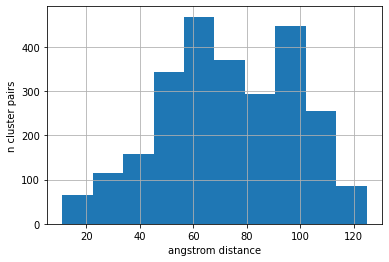

[ 1  6 11 19 27 34 53 60 62 74 76 78 97]


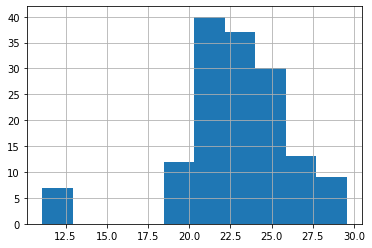

In [18]:
from matplotlib import pyplot as plt

candidates = candidates[candidates.r1res != candidates.r2res]
print(candidates)

#candidates.d.hist()
close = candidates[candidates.d < 30 ]
close = close[ close.r1res != close.r2res ]
#close = close[close.cluster != 41]
print(close)
plt.ylabel('n cluster pairs')
plt.xlabel('angstrom distance')
candidates.d.hist()
plt.show()
print(close.cluster.unique())
close.d.hist()

candidates.to_csv('./candidates.csv')

In [ ]:


#plot interprot 


#plot intraprot dist